# Linear Regression
We will predict $y\in\mathbb{R}$ from data $x\in\mathbb{R}^n$. We will use a dataset of the form $(x^{(i)},y^{(i)})$.

In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rng = np.random

Define the learning parameters

In [4]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

Define the learning data

In [9]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

Tensorflow graph input

In [6]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

Set the model weights

In [5]:
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Construct a linear model

In [7]:
pred = tf.add(tf.multiply(X, W), b)

Define the cost function

In [10]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

Gradient descent learning

In [11]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Initializing the variables

In [12]:
init = tf.global_variables_initializer()

Launch the graph and lets start the training!

In [17]:
sess = tf.InteractiveSession()

In [18]:
sess.run(init)

#Fit all the training data
for epoch in range(training_epochs):
    for(x,y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y:y})

    #Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
        print("Epoch:", '%04d'%(epoch+1), "cost=","{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print("Training cost=",training_cost, "W=",sess.run(W), "b=", sess.run(b), '\n')

Epoch: 0050 cost= 0.247858182 W= 0.0189816 b= 2.46047
Epoch: 0100 cost= 0.228157043 W= 0.0326973 b= 2.3618
Epoch: 0150 cost= 0.210729539 W= 0.0455966 b= 2.26901
Epoch: 0200 cost= 0.195312157 W= 0.0577288 b= 2.18173
Epoch: 0250 cost= 0.181672603 W= 0.0691397 b= 2.09964
Epoch: 0300 cost= 0.169605926 W= 0.0798723 b= 2.02243
Epoch: 0350 cost= 0.158930913 W= 0.0899667 b= 1.94981
Epoch: 0400 cost= 0.149487182 W= 0.0994606 b= 1.88151
Epoch: 0450 cost= 0.141132951 W= 0.10839 b= 1.81728
Epoch: 0500 cost= 0.133742049 W= 0.116787 b= 1.75686
Epoch: 0550 cost= 0.127203450 W= 0.124686 b= 1.70004
Epoch: 0600 cost= 0.121418729 W= 0.132115 b= 1.6466
Epoch: 0650 cost= 0.116300739 W= 0.139102 b= 1.59633
Epoch: 0700 cost= 0.111772880 W= 0.145674 b= 1.54906
Epoch: 0750 cost= 0.107767522 W= 0.151854 b= 1.5046
Epoch: 0800 cost= 0.104223847 W= 0.157667 b= 1.46278
Epoch: 0850 cost= 0.101088546 W= 0.163134 b= 1.42345
Epoch: 0900 cost= 0.098314486 W= 0.168276 b= 1.38646
Epoch: 0950 cost= 0.095860451 W= 0.173112 

Graphic display

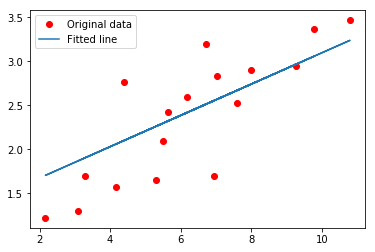

In [20]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(W)*train_X+sess.run(b), label='Fitted line')
plt.legend()
plt.show()

Testing an example

In [21]:
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

Testing using mean square loss comparison

In [22]:
testing_cost = sess.run(tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]), feed_dict={X: test_X, Y: test_Y})
print("Testing cost=", testing_cost)
print("Absolute mean square loss difference:", abs(training_cost - testing_cost))

Testing cost= 0.111984
Absolute mean square loss difference: 0.0182954


Plotting the testing data

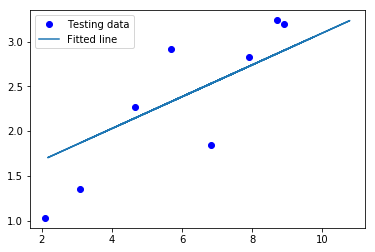

In [23]:
plt.plot(test_X, test_Y, 'bo', label='Testing data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()